In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from transformers import pipeline

/Users/faustogerman/miniforge3/envs/PekinSearch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Sentiment Analysis

### Load the Sentiment Analysis Pre-Trained Model for Positive, Negative, Neutral

In [2]:
sentiment_pipeline = pipeline("text-classification", model='cardiffnlp/twitter-roberta-base-sentiment-latest')

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Load the Dataset

In [3]:
RAW_DATA = pd.read_json("./test_data.json")

### Analyze the Tweets

In [4]:
tweets = list(RAW_DATA["clean_text"])
tweets_sentiment = sentiment_pipeline(tweets)

tweets_sentiment

[{'label': 'Neutral', 'score': 0.9214152693748474},
 {'label': 'Neutral', 'score': 0.7376472353935242},
 {'label': 'Neutral', 'score': 0.8746472597122192},
 {'label': 'Negative', 'score': 0.8534603714942932},
 {'label': 'Neutral', 'score': 0.6977518796920776},
 {'label': 'Positive', 'score': 0.6310144662857056},
 {'label': 'Positive', 'score': 0.5668401122093201},
 {'label': 'Neutral', 'score': 0.8343232274055481},
 {'label': 'Neutral', 'score': 0.5244272351264954},
 {'label': 'Neutral', 'score': 0.5021820068359375},
 {'label': 'Neutral', 'score': 0.5941541790962219},
 {'label': 'Neutral', 'score': 0.6395420432090759},
 {'label': 'Positive', 'score': 0.6544804573059082},
 {'label': 'Negative', 'score': 0.8532200455665588},
 {'label': 'Positive', 'score': 0.7579551339149475},
 {'label': 'Neutral', 'score': 0.8193609118461609},
 {'label': 'Positive', 'score': 0.9861612319946289},
 {'label': 'Positive', 'score': 0.6391264796257019},
 {'label': 'Neutral', 'score': 0.7295262813568115},
 {'l

### Plot a Histogram of the Sentiment Analysis Result

In [5]:
sentiment_histograms = {
    "positive": 0,
    "negative": 0,
    "neutral": 0
}

for sentiment in tweets_sentiment:
    sentiment_histograms[sentiment['label'].lower()] += 1

sentiment_histograms

{'positive': 34, 'negative': 6, 'neutral': 60}

<BarContainer object of 3 artists>

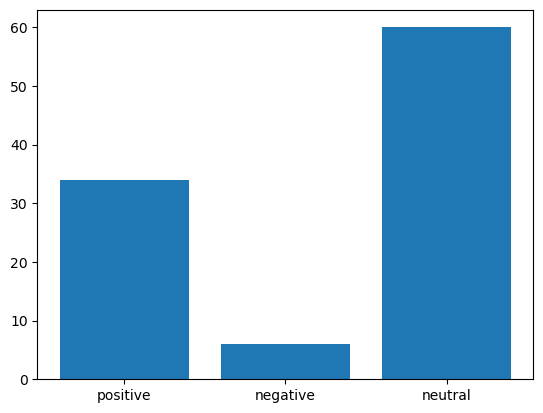

In [6]:
plt.bar(sentiment_histograms.keys(), sentiment_histograms.values())

### Append the Sentiment Analysis Results to teh Dataset

In [7]:
sentiment_labels = [s['label'] for s in tweets_sentiment]
sentiment_scores = [s['score'] for s in tweets_sentiment]

RAW_DATA["sentiment_label"] = sentiment_labels
RAW_DATA["sentiment_score"] = sentiment_scores

RAW_DATA

,id,text,clean_text,created_at,is_sensitive,retweet_count,reply_count,like_count,quote_count,hashtags,sentiment_label,sentiment_score
0,1593098408189120514,RT @groundzerofm: #NowPlaying: University of T...,NowPlaying University of Texas at Austin Earth...,2022-11-17 04:27:13,False,1,0,0,0,"[NowPlaying, Alexa, Android, Apple]",Neutral,0.921415
1,1593098273359007745,RT @orfonline: 🚨 #COP27 PolicyPod: Is the worl...,COP27 PolicyPod Is the world climate disaster ...,2022-11-17 04:26:41,False,25,0,0,0,"[COP27, climate]",Neutral,0.737647
2,1593098232405831681,"The controversy of #MLS and #Apple +, my opini...",The controversy of MLS and Apple my opinion via,2022-11-17 04:26:31,False,0,0,0,0,"[MLS, Apple]",Neutral,0.874647
3,1593098049509031936,"Pixel7pro is big mistake?\nNot solved, indian ...",Pixel7pro is big mistake Not solved indian cus...,2022-11-17 04:25:47,False,0,0,0,0,"[teampixel, sunderpichai, googlepixel7pro, goo...",Negative,0.853460
4,1593097989958291456,RT @Tian_A1: BrainKids Educative Game Now avai...,BrainKids Educative Game Now available Apple A...,2022-11-17 04:25:33,False,3,0,0,0,"[Apple, Google]",Neutral,0.697752
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1593088146547380225,#Apple (@Apple) Watch : #SteveWozniak (@stevew...,Apple Watch SteveWozniak est un fan,2022-11-17 03:46:26,False,0,0,0,0,"[Apple, SteveWozniak]",Neutral,0.747318
96,1593087913214238721,That’s how #Apple so wealthy. https://t.co/zlK...,That s how Apple so wealthy,2022-11-17 03:45:31,False,0,0,1,0,[Apple],Neutral,0.566213
97,1593087783010082816,. @Apple rolls out #iPhone emergency SOS satel...,rolls out iPhone emergency SOS satellite alert...,2022-11-17 03:45:00,False,0,0,1,0,"[iPhone, Mobile, Technology]",Neutral,0.848590
98,1593087425072746497,RT @TechInRL: How to Find your Apple Watch! (U...,How to Find your Apple Watch Updated applewatc...,2022-11-17 03:43:34,False,2,0,0,0,"[applewatchseries7, AppleWatch, AppleWatchSeri...",Neutral,0.533736


## Load the Emotion Analysis Pre-Trained Model
This model can classify text as one of **anger**, **fear**, **joy**, **love**, **sadness**, **surprise**.

In [8]:
emotion_pipeline = pipeline(
    "text-classification",
    model='bhadresh-savani/distilbert-base-uncased-emotion',
)

### Analyze the Tweets

In [9]:
tweets_emotion = emotion_pipeline(tweets)

tweets_emotion

[{'label': 'joy', 'score': 0.9114171862602234},
 {'label': 'joy', 'score': 0.8753363490104675},
 {'label': 'anger', 'score': 0.99054354429245},
 {'label': 'joy', 'score': 0.9083447456359863},
 {'label': 'joy', 'score': 0.9327709674835205},
 {'label': 'joy', 'score': 0.9872831106185913},
 {'label': 'joy', 'score': 0.5189870595932007},
 {'label': 'joy', 'score': 0.866680383682251},
 {'label': 'joy', 'score': 0.5195012092590332},
 {'label': 'joy', 'score': 0.858794629573822},
 {'label': 'joy', 'score': 0.984187126159668},
 {'label': 'joy', 'score': 0.9976008534431458},
 {'label': 'joy', 'score': 0.9740027189254761},
 {'label': 'joy', 'score': 0.7792550921440125},
 {'label': 'joy', 'score': 0.7146654725074768},
 {'label': 'joy', 'score': 0.7330877184867859},
 {'label': 'love', 'score': 0.9956966638565063},
 {'label': 'joy', 'score': 0.7348913550376892},
 {'label': 'joy', 'score': 0.9262746572494507},
 {'label': 'sadness', 'score': 0.8501399755477905},
 {'label': 'fear', 'score': 0.71447187

### Plot a Histogram of the Emotion Analysis Result

In [10]:
emotion_histograms = {
    "anger": 0,
    "fear": 0,
    "joy": 0,
    "love": 0,
    "sadness": 0,
    "surprise": 0
}

for emotion in tweets_emotion:
    emotion_histograms[emotion['label'].lower()] += 1

emotion_histograms

{'anger': 12, 'fear': 5, 'joy': 75, 'love': 4, 'sadness': 4, 'surprise': 0}

<BarContainer object of 6 artists>

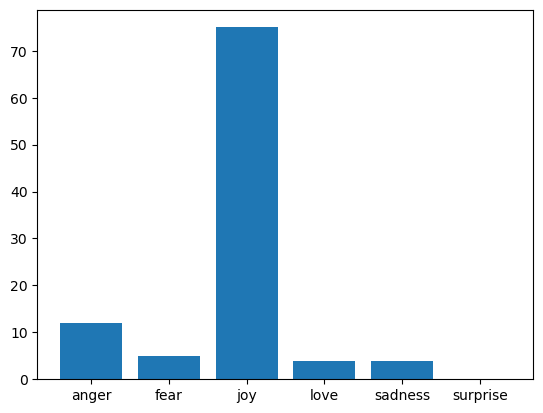

In [11]:
plt.bar(emotion_histograms.keys(), emotion_histograms.values())

### Append the Emotion Analysis Results to teh Dataset

In [12]:
emotion_labels = [s['label'] for s in tweets_emotion]
emotion_scores = [s['score'] for s in tweets_emotion]

RAW_DATA["emotion_label"] = emotion_labels
RAW_DATA["emotion_score"] = emotion_scores

RAW_DATA

,id,text,clean_text,created_at,is_sensitive,retweet_count,reply_count,like_count,quote_count,hashtags,sentiment_label,sentiment_score,emotion_label,emotion_score
0,1593098408189120514,RT @groundzerofm: #NowPlaying: University of T...,NowPlaying University of Texas at Austin Earth...,2022-11-17 04:27:13,False,1,0,0,0,"[NowPlaying, Alexa, Android, Apple]",Neutral,0.921415,joy,0.911417
1,1593098273359007745,RT @orfonline: 🚨 #COP27 PolicyPod: Is the worl...,COP27 PolicyPod Is the world climate disaster ...,2022-11-17 04:26:41,False,25,0,0,0,"[COP27, climate]",Neutral,0.737647,joy,0.875336
2,1593098232405831681,"The controversy of #MLS and #Apple +, my opini...",The controversy of MLS and Apple my opinion via,2022-11-17 04:26:31,False,0,0,0,0,"[MLS, Apple]",Neutral,0.874647,anger,0.990544
3,1593098049509031936,"Pixel7pro is big mistake?\nNot solved, indian ...",Pixel7pro is big mistake Not solved indian cus...,2022-11-17 04:25:47,False,0,0,0,0,"[teampixel, sunderpichai, googlepixel7pro, goo...",Negative,0.853460,joy,0.908345
4,1593097989958291456,RT @Tian_A1: BrainKids Educative Game Now avai...,BrainKids Educative Game Now available Apple A...,2022-11-17 04:25:33,False,3,0,0,0,"[Apple, Google]",Neutral,0.697752,joy,0.932771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1593088146547380225,#Apple (@Apple) Watch : #SteveWozniak (@stevew...,Apple Watch SteveWozniak est un fan,2022-11-17 03:46:26,False,0,0,0,0,"[Apple, SteveWozniak]",Neutral,0.747318,joy,0.613935
96,1593087913214238721,That’s how #Apple so wealthy. https://t.co/zlK...,That s how Apple so wealthy,2022-11-17 03:45:31,False,0,0,1,0,[Apple],Neutral,0.566213,joy,0.993431
97,1593087783010082816,. @Apple rolls out #iPhone emergency SOS satel...,rolls out iPhone emergency SOS satellite alert...,2022-11-17 03:45:00,False,0,0,1,0,"[iPhone, Mobile, Technology]",Neutral,0.848590,joy,0.559165
98,1593087425072746497,RT @TechInRL: How to Find your Apple Watch! (U...,How to Find your Apple Watch Updated applewatc...,2022-11-17 03:43:34,False,2,0,0,0,"[applewatchseries7, AppleWatch, AppleWatchSeri...",Neutral,0.533736,joy,0.940285


## Save as a New Dataset

In [13]:
RAW_DATA.to_json("test_data_with_sentiment.json", orient='records')